In [1]:
import re   # for regular expressions
import nltk # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Try reading the file with a different encoding
file_path = 'D:\Program Files\PFE\SA_pipline\Airline-Sentiment-2-w-AA.csv'

# Try with 'latin1' encoding
try:
    data = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    # Try with 'iso-8859-1' encoding if 'latin1' fails
    data = pd.read_csv(file_path, encoding='iso-8859-1')

print(data.head())

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN  

In [3]:
data = data.loc[:, ['text', 'airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [5]:
data['tweet'] = np.vectorize(remove_pattern)(data['text'].astype(str), "@[\w]*")
data=data[['tweet','airline_sentiment','text']]
data.head()

,tweet,airline_sentiment,text
0,What said.,neutral,@VirginAmerica What @dhepburn said.
1,plus you've added commercials to the experien...,positive,@VirginAmerica plus you've added commercials t...
2,I didn't today... Must mean I need to take an...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,"it's really aggressive to blast obnoxious ""en...",negative,@VirginAmerica it's really aggressive to blast...
4,and it's a really big bad thing about it,negative,@VirginAmerica and it's a really big bad thing...


In [6]:
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"[^a-zA-Z#]", " ", x))
data.head(10)


,tweet,airline_sentiment,text
0,What said,neutral,@VirginAmerica What @dhepburn said.
1,plus you ve added commercials to the experien...,positive,@VirginAmerica plus you've added commercials t...
2,I didn t today Must mean I need to take an...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,it s really aggressive to blast obnoxious en...,negative,@VirginAmerica it's really aggressive to blast...
4,and it s a really big bad thing about it,negative,@VirginAmerica and it's a really big bad thing...
5,seriously would pay a flight for seats th...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,yes nearly every time I fly VX this ear w...,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,Really missed a prime opportunity for Men Wit...,neutral,@VirginAmerica Really missed a prime opportuni...
8,Well I didn t but NOW I DO D,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,it was amazing and arrived an hour early Yo...,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [7]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(10)

,tweet,airline_sentiment,text
0,What said,neutral,@VirginAmerica What @dhepburn said.
1,plus added commercials experience tacky,positive,@VirginAmerica plus you've added commercials t...
2,didn today Must mean need take another trip,neutral,@VirginAmerica I didn't today... Must mean I n...
3,really aggressive blast obnoxious entertainmen...,negative,@VirginAmerica it's really aggressive to blast...
4,really thing about,negative,@VirginAmerica and it's a really big bad thing...
5,seriously would flight seats that didn have th...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,nearly every time this worm away,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,Really missed prime opportunity Without Hats p...,neutral,@VirginAmerica Really missed a prime opportuni...
8,Well didn,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,amazing arrived hour early good,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [8]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: tweet, dtype: object

In [9]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [10]:
for i in range(len(tokenized_tweet)):
       tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['tweet'] = tokenized_tweet


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['tweet'])
tfidf.shape

(14640, 1000)

In [13]:
data.head()

,tweet,airline_sentiment,text
0,what said,neutral,@VirginAmerica What @dhepburn said.
1,plu ad commerci experi tacki,positive,@VirginAmerica plus you've added commercials t...
2,didn today must mean need take anoth trip,neutral,@VirginAmerica I didn't today... Must mean I n...
3,realli aggress blast obnoxi entertain your gue...,negative,@VirginAmerica it's really aggressive to blast...
4,realli thing about,negative,@VirginAmerica and it's a really big bad thing...


In [14]:
# Remplacement des étiquettes par des valeurs numériques
label_mapping = {
    "neutral": 1,
    "positive": 2,
    "negative": 0
}
data['label_numeric'] = data['airline_sentiment'].map(label_mapping)
X = tfidf  # Features
y = data['label_numeric']  # Labels

In [16]:
y.shape

(14640,)

In [15]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Importer les bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

# Entraîner un modèle de classification (exemple avec Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculer l'AUC-ROC pour chaque classe (nécessite des scores de probabilité)
y_prob = model.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) # adapter selon vos classes

# Calcul de l'AUC-ROC pour chaque classe et la moyenne macro
auc_roc = roc_auc_score(y_test_binarized, y_prob, average='macro')
print("AUC-ROC (macro):", auc_roc)

# Calcul de la précision de validation croisée (CV-Accuracy)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_accuracy = cv_scores.mean()
print("CV-Accuracy:", cv_accuracy)


Accuracy: 0.7595628415300546
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1889
           1       0.58      0.45      0.51       580
           2       0.72      0.61      0.66       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928

AUC-ROC (macro): 0.8550054163518758
CV-Accuracy: 0.7466693127738822


In [18]:
# Entraîner un modèle de classification (exemple avec Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7581967213114754
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1889
           1       0.58      0.46      0.51       580
           2       0.69      0.61      0.65       459

    accuracy                           0.76      2928
   macro avg       0.69      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



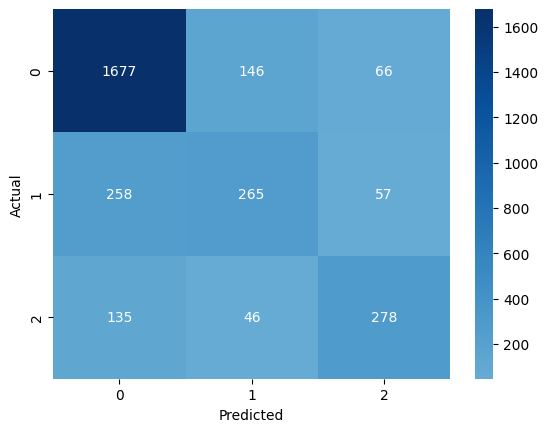

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Initialization of the logistic regression model with OneVsRestClassifier
lreg = OneVsRestClassifier(LogisticRegression())

# Training the model on the training set
lreg.fit(X_train, y_train)

# Predicting probabilities on the test set
predictionlreg = lreg.predict_proba(X_test)

# For a multiclass problem, we take the class with the highest probability
# Adjust the threshold for binary cases
threshold = 0.3
prediction_int = (predictionlreg >= threshold).astype(int)

# Adjust to take the class with the highest probability
# For multiclass, consider the class with the highest probability
# Use the index of the maximum probability for each example
y_predlreg = np.argmax(predictionlreg, axis=1)

# Calculate F1 score on the validation set
f1lreg = f1_score(y_test, y_predlreg, average='micro')

# Calculate accuracy on the validation set
accuracylreg = accuracy_score(y_test, y_predlreg)
print("F1 Score:", f1lreg)
print("Accuracy:", accuracylreg)

# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_predlreg))


F1 Score: 0.7841530054644809
Accuracy: 0.7841530054644809
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1889
           1       0.67      0.42      0.51       580
           2       0.79      0.61      0.69       459

    accuracy                           0.78      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



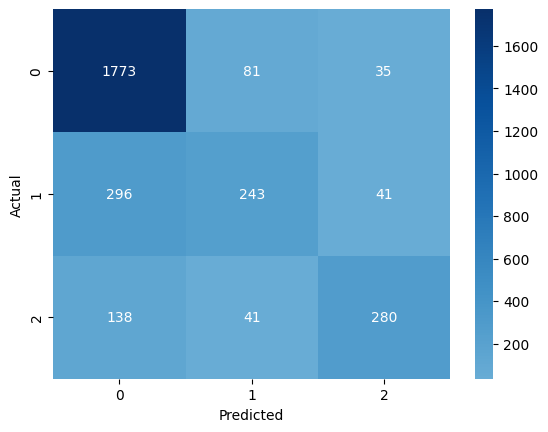

In [27]:
y_predlreg = lreg.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predlreg)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Initialiser et entraîner le modèle SVM avec un noyau linéaire
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
predictionsvm = svc.predict_proba(X_test)

# Trouver la classe avec la probabilité la plus élevée pour chaque échantillon
y_predsvm = np.argmax(predictionsvm, axis=1)

# Calcul du F1 score pour l'ensemble de validation
f1SVM = f1_score(y_test, y_predsvm, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_SVM = accuracy_score(y_test, y_predsvm)

print("F1 Score:", f1SVM)
print("Accuracy:", accuracy_SVM)
# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_predsvm))


F1 Score: 0.7817622950819672
Accuracy: 0.7817622950819673
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1889
           1       0.62      0.47      0.53       580
           2       0.74      0.66      0.70       459

    accuracy                           0.78      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



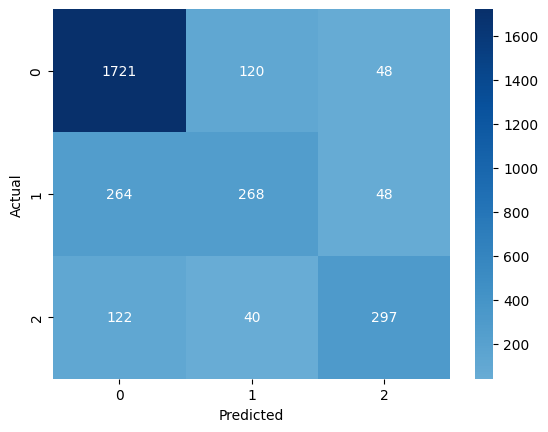

In [29]:
y_predsvm = svc.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predsvm)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Supposons que 'bow' représente les features extraites avec Bag-of-Words
# et 'df['label_numeric']' représente les labels numériques.


# Entraînement du modèle XGBoost
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_XGB = xgb_model.predict(X_test)

# Calcul du F1 score pour l'ensemble de validation
f1_XGB = f1_score(y_test, prediction_XGB, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_XGB = accuracy_score(y_test, prediction_XGB)

print("F1 Score:", f1_XGB)
print("Accuracy:", accuracy_XGB)
# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, prediction_XGB))


F1 Score: 0.7752732240437158
Accuracy: 0.7752732240437158
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1889
           1       0.59      0.52      0.55       580
           2       0.71      0.64      0.68       459

    accuracy                           0.78      2928
   macro avg       0.71      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



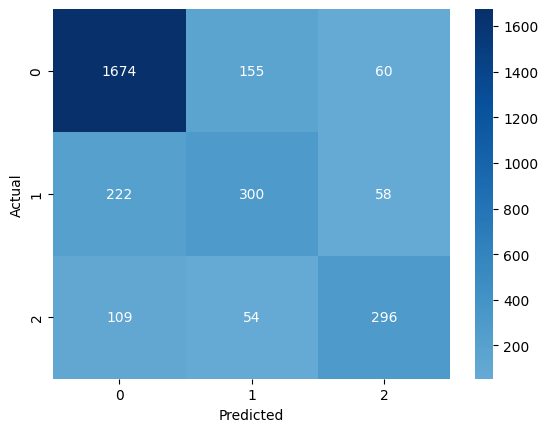

In [31]:
y_predxgb = xgb_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predxgb)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier


# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_knn = knn_model.predict(X_test)

# Calcul du F1 score pour l'ensemble de validation
f1_knn = f1_score(y_test, prediction_knn, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_knn = accuracy_score(y_test, prediction_knn)

print("F1 Score:", f1_knn)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, prediction_knn))


F1 Score: 0.4016393442622951
Accuracy: 0.4016393442622951
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.30      0.43      1889
           1       0.23      0.76      0.35       580
           2       0.75      0.37      0.49       459

    accuracy                           0.40      2928
   macro avg       0.58      0.48      0.42      2928
weighted avg       0.65      0.40      0.42      2928



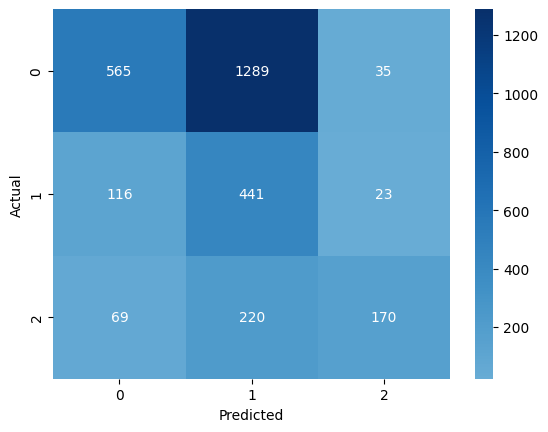

In [33]:
y_predknn = knn_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predknn)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from sklearn.naive_bayes import MultinomialNB
# Initialiser et entraîner le modèle Naive Bayes multinomial
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
prediction_nb = nb_model.predict(X_test)

# Calculer le F1 score et l'accuracy
f1_nb = f1_score(y_test, prediction_nb, average='micro')
accuracy_nb = accuracy_score(y_test, prediction_nb)

print("F1 Score:", f1_nb)
print("Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, prediction_nb))

F1 Score: 0.7564890710382515
Accuracy: 0.7564890710382514
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1889
           1       0.70      0.28      0.40       580
           2       0.86      0.46      0.60       459

    accuracy                           0.76      2928
   macro avg       0.77      0.57      0.62      2928
weighted avg       0.76      0.76      0.72      2928



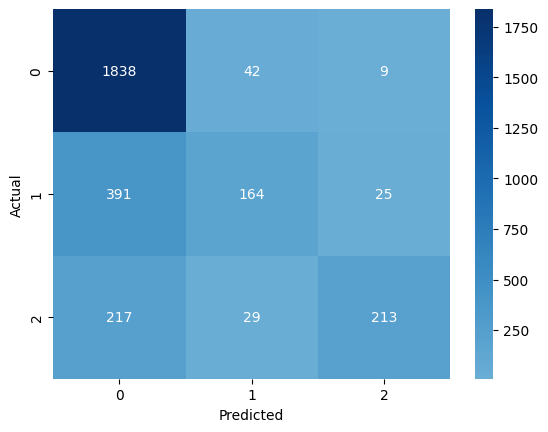

In [35]:
y_prednb = nb_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_prednb)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

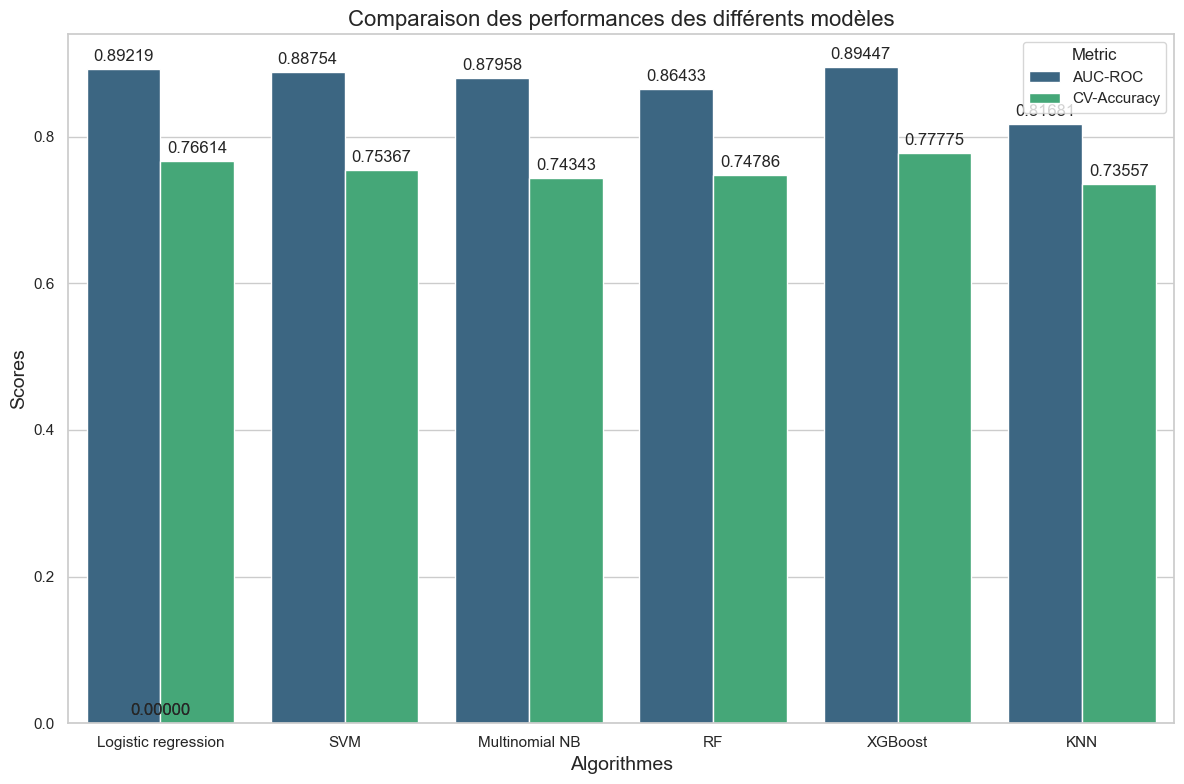

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données
data = {
    'Algorithm': ['Logistic regression', 'SVM', 'Multinomial NB', 'RF', 'XGBoost', 'KNN'],
    'AUC-ROC': [0.89219, 0.88754, 0.87958, 0.86433, 0.89447, 0.81681],
    'CV-Accuracy': [0.76614, 0.75367, 0.74343, 0.74786, 0.77775, 0.73557]
}

# Conversion en DataFrame
df = pd.DataFrame(data)

# Conversion en format long pour Seaborn
df_long = pd.melt(df, id_vars='Algorithm', value_vars=['AUC-ROC', 'CV-Accuracy'],
                  var_name='Metric', value_name='Score')

# Initialisation du style Seaborn
sns.set(style="whitegrid")

# Création du graphique
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=df_long, palette='viridis')

# Ajout des labels, du titre et de la légende
bar_plot.set_title('Comparaison des performances des différents modèles', fontsize=16)
bar_plot.set_xlabel('Algorithmes', fontsize=14)
bar_plot.set_ylabel('Scores', fontsize=14)

# Affichage des valeurs sur les barres
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.5f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Ajustement de la mise en page pour éviter le chevauchement
plt.tight_layout()

plt.show()
